In [1]:
# Importing necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import mean_squared_error, log_loss
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import itertools

In [2]:
# Uploading DataFrame and inspecting its contents
df = pd.DataFrame()
df = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/NFL Capstone Project/Data Wrangling/nfl_df.csv', delimiter='\t', index_col=0)
df.head()

,Date,Home Field Goal Attempts,Home First Downs,Home Fourth Down Attempts,Home Fourth Down Successes,Home Fumble TDs,Home Fumbles,Home Fumbles Lost,Home Fumbles Recovered,Home Goal To Go Attempts,...,Road Time of Possession,Road Total TDs,Road Total Yds,Road Touchbacks,Road Two Point Conversion Attempts,Road Two Point Conversion Successes,Road Win,Road Wins,Season,Week Number
0,"on December 20, 2015",1,19,2,0,0,2,2,0,0,...,2248,5,506,3,0,0,True,1,nfl-2015-2016,15
1,"on November 29, 2015",2,17,2,1,0,2,1,0,0,...,2247,2,350,1,0,0,True,1,nfl-2015-2016,12
2,"on December 27, 2015",1,19,0,0,2,2,1,3,3,...,1784,1,265,0,1,1,False,0,nfl-2015-2016,16
3,"on November 22, 2015",2,21,0,0,0,2,0,1,1,...,1875,4,415,3,0,0,False,0,nfl-2015-2016,11
4,"on January 3, 2016",1,16,1,0,0,0,0,0,0,...,2197,4,382,7,0,0,True,1,nfl-2015-2016,17


In [3]:
# Setting X and y for Road Teams with X having just statistics, y being Road Win
RW_X = df.drop(['Season', 'Week Number', 'Date', 'Name of Winning Team', 'Name of Losing Team', 'Name of Tying Teams', 'Road Team Name', 'Home Team Name', 'Road Win', 'Road Loss', 'Road Tie', 'Road Wins', 'Road Losses', 'Road Ties', 'Home Win', 'Home Loss', 'Home Tie', 'Home Wins', 'Home Losses', 'Home Ties', 'Road Points', 'Home Points'], axis=1)
RW_y = df['Road Win']

# Splitting the data into Train and Test
RW_X_train, RW_X_test, RW_y_train, RW_y_test = train_test_split(RW_X, RW_y, test_size = 0.2, random_state=42, stratify=RW_y)

In [4]:
# Setting up parameter C
c_space = np.logspace(-5, 8, 5)
RW_param_grid = {'C': c_space}

# Setting up Logistic Regression Model
RW_logreg = LogisticRegression()

# Using GridSearchCV to help avoid overfitting
RW_CV = GridSearchCV(RW_logreg, RW_param_grid, cv=5)

In [5]:
# Fitting Training Data to model and finding best parameter as well as score
RW_CV.fit(RW_X_train, RW_y_train)
print('Best Parameter for Road Win Model: ' + str(RW_CV.best_params_))
print('Best Score for Road Win Model: ' + str(RW_CV.best_score_))

Best Parameter for Road Win Model: {'C': 100000000.0}
Best Score for Road Win Model: 0.923357664234


In [6]:
# Setting up prediction based on testing data for X
RW_y_pred = RW_CV.predict(RW_X_test)

# Printing R Squared
R2_RW = RW_CV.score(RW_X_test, RW_y_test)
print('R squared: ' + str(R2_RW))

# Computing and printing Mean Squared Error
RW_rmse = np.sqrt(mean_squared_error(RW_y_test, RW_y_pred))
print('Root Mean Squared Error: ' + str(RW_rmse))

R squared: 0.963768115942
Root Mean Squared Error: 0.190346746907


/Users/dwreiter/miniconda2/envs/tutorial/lib/python2.7/site-packages/sklearn/metrics/regression.py:239: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


In [7]:
# Calculating the Accuracy Score as well as printing the Confusion Matrix and Classification Report
RW_score = metrics.accuracy_score(RW_y_test, RW_y_pred)

RW_CM = metrics.confusion_matrix(RW_y_test, RW_y_pred)

RW_CR = metrics.classification_report(RW_y_test, RW_y_pred)

print('Accuracy Score: ' + str(RW_score))
print(RW_CM)
print(RW_CR)

Accuracy Score: 0.963768115942
[[76  3]
 [ 2 57]]
             precision    recall  f1-score   support

      False       0.97      0.96      0.97        79
       True       0.95      0.97      0.96        59

avg / total       0.96      0.96      0.96       138



In [8]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=17, rotation=15)
    plt.yticks(tick_marks, classes, fontsize=17)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.rcParams.update({'font.size': 20})
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.tight_layout()

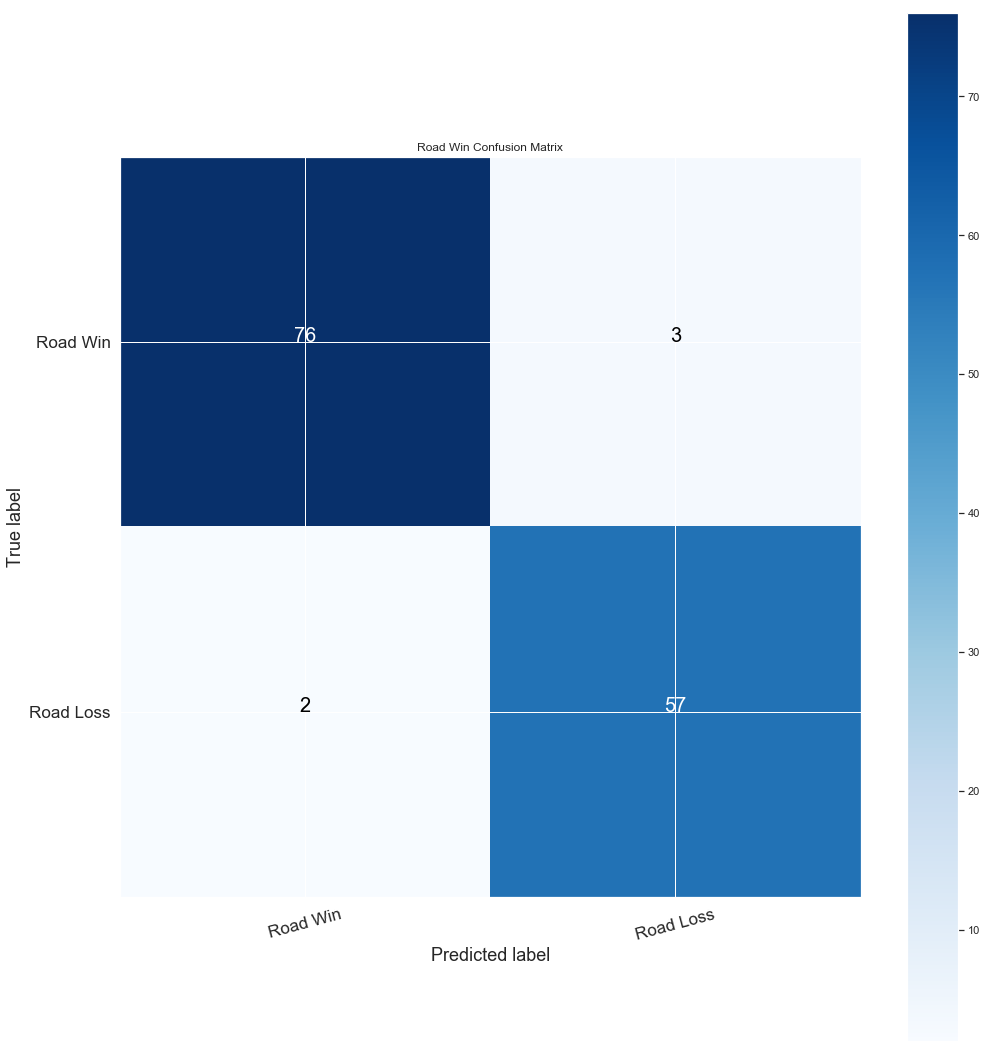

In [10]:
# Plotting the Confusion Matrix
_ = plot_confusion_matrix(RW_CM, classes=['Road Win', 'Road Loss'], title='Road Win Confusion Matrix')
_ = plt.savefig('RW Confusion Matrix Plot.png')

** After all the tests for the Logistic Regression model, we get a very high accuracy score with about 96% for prediction and a low RMSE. The Confusion Matrix and Classification Report support the predictive power with 133 labels correctly classified along with high precision and recall.**

In [11]:
# Finding out which games were mislabeled
RW_dif = RW_y_test[RW_y_test != RW_y_pred]
RW_dif = df.loc[list(RW_dif.index.values), :]
RW_dif

,Date,Home Field Goal Attempts,Home First Downs,Home Fourth Down Attempts,Home Fourth Down Successes,Home Fumble TDs,Home Fumbles,Home Fumbles Lost,Home Fumbles Recovered,Home Goal To Go Attempts,...,Road Time of Possession,Road Total TDs,Road Total Yds,Road Touchbacks,Road Two Point Conversion Attempts,Road Two Point Conversion Successes,Road Win,Road Wins,Season,Week Number
514,"on October 9, 2016",3,18,4,4,0,3,0,0,1,...,1606,1,279,2,1,1,False,0,nfl-2016-2017,5
530,"on December 4, 2016",3,32,1,0,0,0,0,0,4,...,1688,4,393,4,0,0,True,1,nfl-2016-2017,13
1027,"on September 24, 2017",2,18,0,0,0,5,1,0,3,...,2000,4,502,5,0,0,False,1,nfl-2017-2018,3
1144,"on October 8, 2017",2,22,2,1,0,2,1,0,1,...,1534,2,228,3,0,0,True,1,nfl-2017-2018,5
1135,"on October 29, 2017",2,17,0,0,0,4,2,0,2,...,1993,2,348,3,0,0,False,0,nfl-2017-2018,8


In [12]:
# Calculating Feature Importance by setting up Logistic Regression model with best parameter
RW_lr = LogisticRegression(C=100000000.0)
RW_lr.fit(RW_X_train, RW_y_train)
RW_lr.coef_

# Creating DataFrame sorted by the features that have the strongest impact
RW_features = pd.concat([pd.DataFrame(RW_X.columns),pd.DataFrame(np.transpose(RW_lr.coef_))], axis = 1)
RW_features.columns = ['Statistic', 'Predictive Value']
RW_features = RW_features.reindex(RW_features['Predictive Value'].abs().sort_values(ascending=False).index)
RW_features

,Statistic,Predictive Value
43,Home Total TDs,-7.343477
91,Road Total TDs,6.986470
17,Home Made Field Goals,-5.023082
54,Road Fumbles Lost,-4.332998
65,Road Made Field Goals,4.161944
58,Road INT TDs,3.568232
47,Home Two Point Conversion Successes,-3.327784
21,Home Passing TDs,-2.372298
50,Road Fourth Down Attempts,-2.278153
93,Road Touchbacks,2.254007


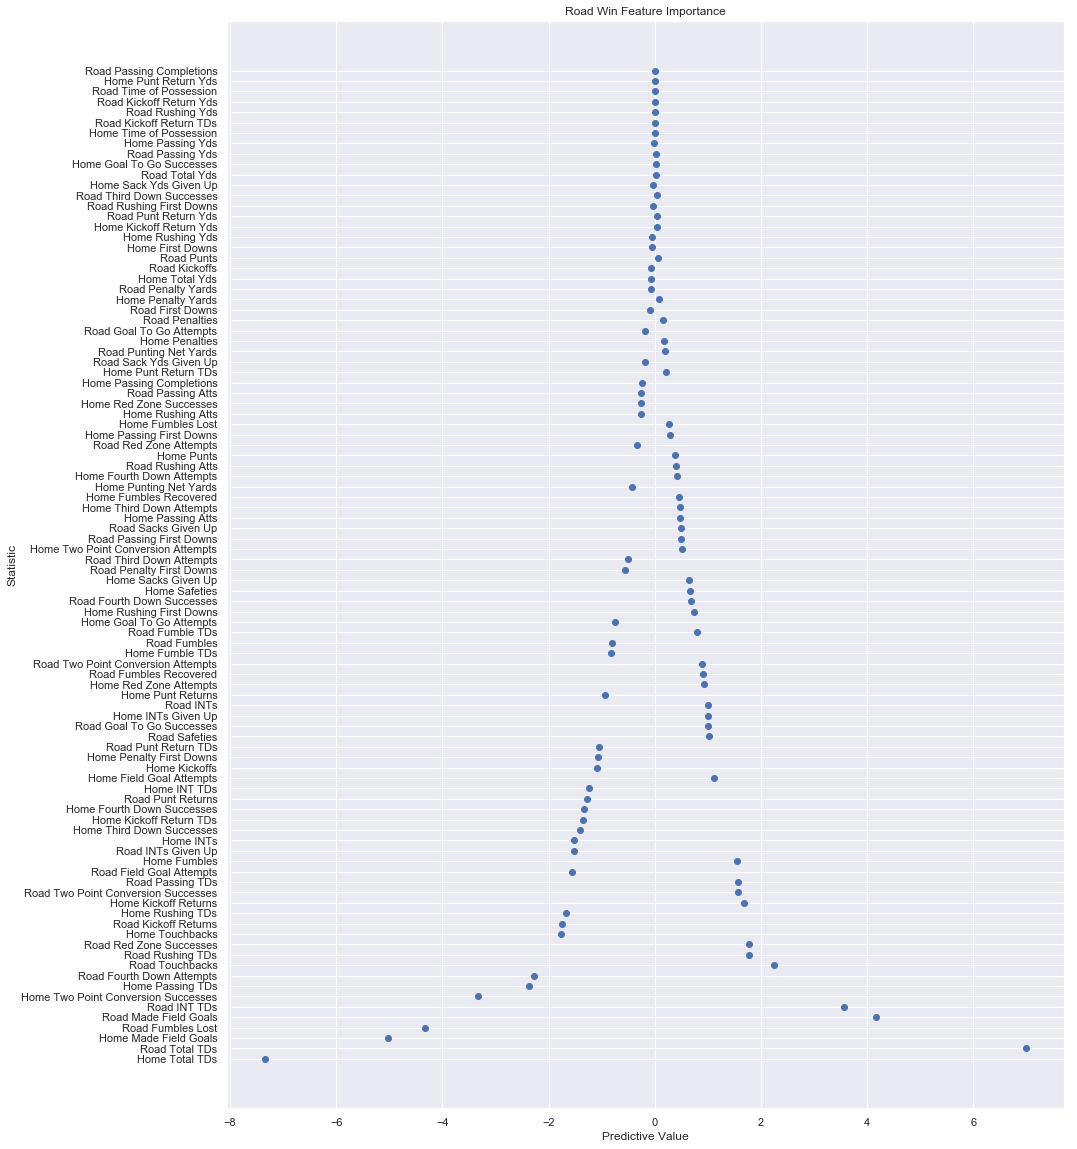

In [13]:
# Plotting the Feature Importance
_ = plt.figure(figsize=(15, 20))
_ = plt.scatter(x=RW_features['Predictive Value'], y=RW_features['Statistic'])
_ = plt.xlabel('Predictive Value')
_ = plt.ylabel('Statistic')
_ = plt.title('Road Win Feature Importance')
_ = plt.savefig('RW Feature Importance.png')

** Some of the most important features in the model focus on scoring especially Total TDs, Made Field Goals and turnover related statistics (all for either team). On the lower end are statistics like Time of Possession and the different type of yards that either team gains.**

In [14]:
# Seeing important stats in mislabeled data
RW_dif[['Road Win', 'Road Total TDs', 'Home Total TDs', 'Road Made Field Goals', 'Home Made Field Goals', 'Road Fumbles Lost', 'Road INT TDs']]

,Road Win,Road Total TDs,Home Total TDs,Road Made Field Goals,Home Made Field Goals,Road Fumbles Lost,Road INT TDs
514,False,1,1,2,3,0,0
530,True,4,3,0,3,1,1
1027,False,4,3,1,1,0,0
1144,True,2,2,1,0,0,0
1135,False,2,3,3,1,0,0


** When looking at the above statistics, it does appear that the scoring features had the biggest impact on incorrectly labeled data as the higher amounts of Road and Home TDs as well as Made Field Goals seem to have confused the model. Therefore, higher scoring games are the biggest issues in creating outliers.**

In [15]:
# Computing Log Loss
RW_LL = log_loss(RW_y_test, RW_y_pred)
print('Log Loss: ' + str(RW_LL))

Log Loss: 1.2514223244


** The Log Loss is high, indicating that there are some issues with the model. I will also attempt a Random Forest model for the data.**

In [16]:
# Setting up a Random Forest Classifier followed by fitting and predicting on the data
RW_rf = RandomForestClassifier(n_estimators=1000, random_state=42)

RW_rf.fit(RW_X_train, RW_y_train)

RW_rf_pred = RW_rf.predict(RW_X_test)

RW_rf_score = metrics.accuracy_score(RW_y_test, RW_rf_pred)
print('Accuracy Score: ' + str(RW_rf_score))

Accuracy Score: 0.920289855072


In [17]:
# Printing out the Confusion Matrix and Classification Report for the Random Forest Classifier
RW_rf_CM = metrics.confusion_matrix(RW_y_test, RW_rf_pred)
RW_rf_CR = metrics.classification_report(RW_y_test, RW_rf_pred)

print(RW_rf_CM)
print(RW_rf_CR)

[[74  5]
 [ 6 53]]
             precision    recall  f1-score   support

      False       0.93      0.94      0.93        79
       True       0.91      0.90      0.91        59

avg / total       0.92      0.92      0.92       138



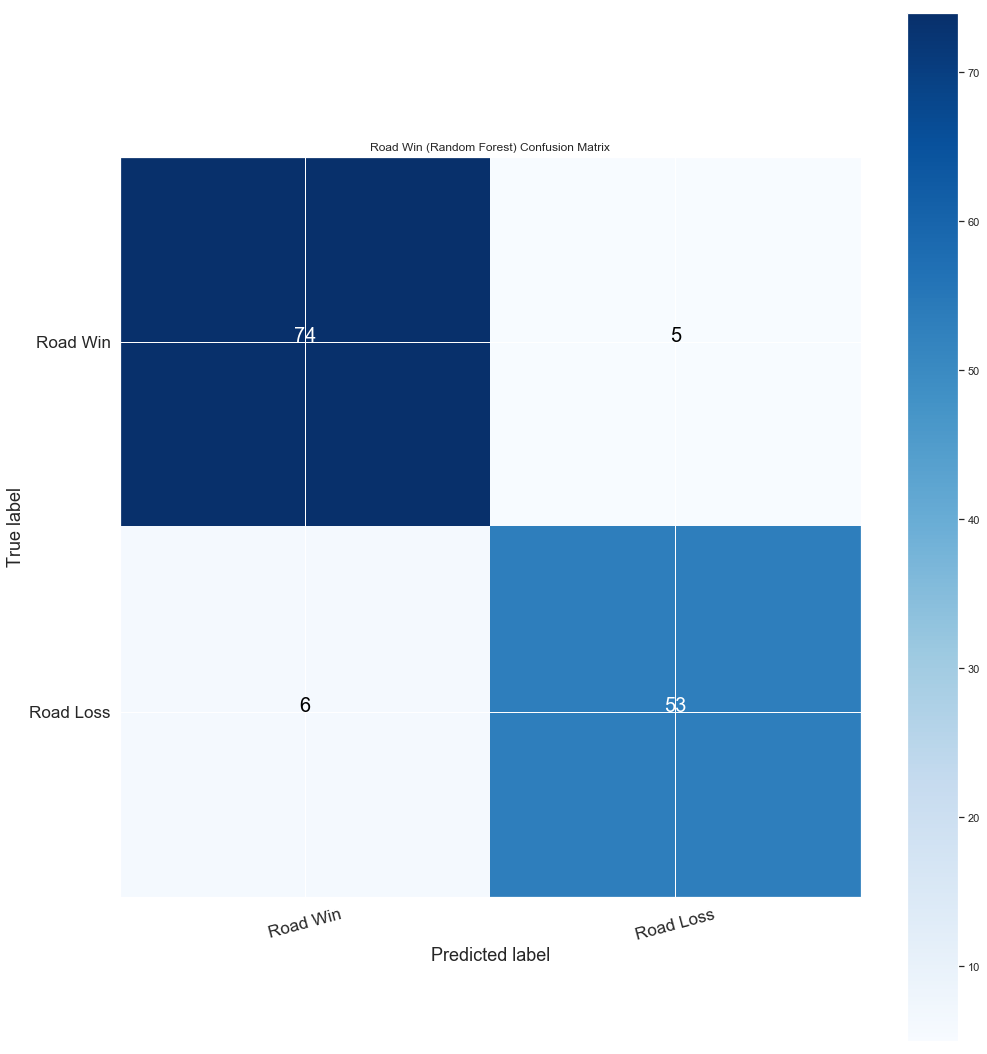

In [18]:
# Plotting the Confusion Matrix
_ = plot_confusion_matrix(RW_rf_CM, classes=['Road Win', 'Road Loss'], title='Road Win (Random Forest) Confusion Matrix')
_ = plt.savefig('RW_rf Confusion Matrix Plot.png')

** After all the tests for the Random Forest model, we get a very high accuracy score with about 92% for prediction. The Confusion Matrix and Classification Report support the predictive power with 127 labels correctly classified along with high precision and recall.H owever, it is not as strong as the Logistic Regression model for Road Win.**

In [19]:
# Finding out which games were mislabeled
RW_rf_dif = RW_y_test[RW_y_test != RW_rf_pred]
RW_rf_dif = df.loc[list(RW_rf_dif.index.values), :]
RW_rf_dif

,Date,Home Field Goal Attempts,Home First Downs,Home Fourth Down Attempts,Home Fourth Down Successes,Home Fumble TDs,Home Fumbles,Home Fumbles Lost,Home Fumbles Recovered,Home Goal To Go Attempts,...,Road Time of Possession,Road Total TDs,Road Total Yds,Road Touchbacks,Road Two Point Conversion Attempts,Road Two Point Conversion Successes,Road Win,Road Wins,Season,Week Number
332,"on November 15, 2015",4,21,0,0,0,3,1,1,2,...,1896,3,414,3,0,0,True,1,nfl-2015-2016,10
530,"on December 4, 2016",3,32,1,0,0,0,0,0,4,...,1688,4,393,4,0,0,True,1,nfl-2016-2017,13
622,"on September 11, 2016",4,22,0,0,0,1,0,0,3,...,1507,2,423,2,0,0,True,1,nfl-2016-2017,1
122,"on December 27, 2015",1,16,1,1,0,1,0,0,0,...,1864,1,372,0,0,0,False,0,nfl-2015-2016,16
550,"on October 2, 2016",2,25,2,1,0,3,1,0,2,...,1516,4,261,1,0,0,True,1,nfl-2016-2017,4
658,"on December 4, 2016",1,19,2,1,0,1,1,0,0,...,1526,2,208,3,0,0,True,1,nfl-2016-2017,13
577,"on January 1, 2017",3,18,0,0,0,1,1,0,1,...,1944,2,365,3,1,0,False,0,nfl-2016-2017,17
690,"on September 18, 2016",1,15,2,1,0,2,1,0,0,...,1782,2,296,1,0,0,False,0,nfl-2016-2017,2
1027,"on September 24, 2017",2,18,0,0,0,5,1,0,3,...,2000,4,502,5,0,0,False,1,nfl-2017-2018,3
624,"on September 25, 2016",1,23,0,0,0,1,1,0,0,...,2242,2,448,6,1,1,False,0,nfl-2016-2017,3


In [20]:
# Calculating Feature Importance from Random Forest Classifier
RW_rf_feature_imp = pd.Series(RW_rf.feature_importances_, index=RW_X.columns).sort_values(ascending=False)
RW_rf_feature_imp

Home Rushing Atts                      0.076156
Home Kickoffs                          0.072109
Road Rushing Atts                      0.060304
Home Total TDs                         0.041304
Road Kickoffs                          0.040220
Road Total TDs                         0.036758
Road Time of Possession                0.027263
Home Time of Possession                0.026704
Home Touchbacks                        0.026371
Road Passing Atts                      0.021767
Home Rushing Yds                       0.021335
Road Fourth Down Attempts              0.018913
Home Passing Atts                      0.018577
Road Rushing Yds                       0.017287
Home Fourth Down Attempts              0.015819
Home Total Yds                         0.014841
Road Red Zone Successes                0.012887
Home Kickoff Return Yds                0.012577
Road Red Zone Attempts                 0.012294
Road Sack Yds Given Up                 0.012130
Road Total Yds                         0

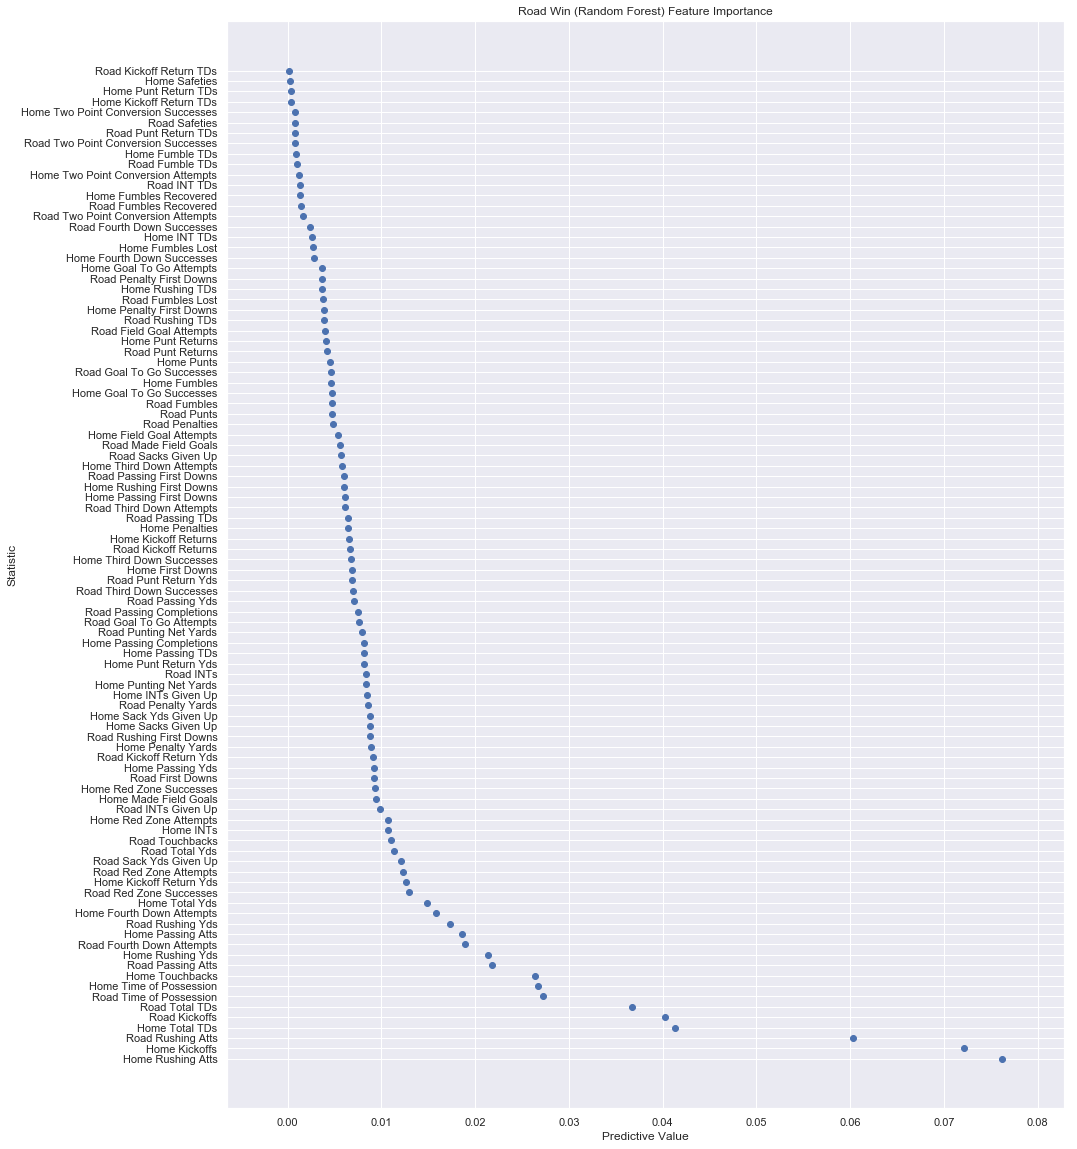

In [21]:
# Plotting the Feature Importance
_ = plt.figure(figsize=(15, 20))
_ = plt.scatter(list(RW_rf_feature_imp), RW_rf_feature_imp.index )
_ = plt.xlabel('Predictive Value')
_ = plt.ylabel('Statistic')
_ = plt.title('Road Win (Random Forest) Feature Importance')
_ = plt.savefig('RW_rf Feature Importance.png')

** Some of the most important features in the model include Home and Road Rushing Attempts, Home and Road Kickoffs, Home and Road Total TDs as well as Home and Road Time of Possession. As expected stats like Passing Yards, for either team, was not that important of a feature and the least important features were some of the less common occurrences in a football game like Kickoff Return TDs, Safeties and Two Point Conversion Successes (for either team). There were definitely some differences though compared to the Logistic Regression features.**

In [22]:
# Seeing important stats in mislabeled data
RW_rf_dif[['Road Win', 'Road Kickoffs', 'Home Kickoffs', 'Road Rushing Atts', 'Home Rushing Atts', 'Road Time of Possession', 'Home Time of Possession', 'Road Total TDs', 'Home Total TDs']]

,Road Win,Road Kickoffs,Home Kickoffs,Road Rushing Atts,Home Rushing Atts,Road Time of Possession,Home Time of Possession,Road Total TDs,Home Total TDs
332,True,6,7,23,23,1896,1704,3,2
530,True,5,6,22,30,1688,1912,4,3
622,True,5,6,19,30,1507,2093,2,2
122,False,4,4,36,27,1864,1736,1,2
550,True,5,6,19,26,1516,2084,4,3
658,True,5,3,28,38,1526,2074,2,1
577,False,4,4,32,25,1944,1656,2,2
690,False,3,4,23,22,1782,1818,2,2
1027,False,6,3,30,38,2000,2039,4,3
624,False,7,5,32,25,2242,1752,2,4


** When looking at the above statistics, it does appear that Rome and Home Kickoffs as well as Rushing Atts had the biggest impact on incorrectly labeled data as the team that led in one of those categories did not win. Therefore, the games where the losing team controls the ball more are the biggest issues in creating outliers.**

In [23]:
# Computing Log Loss for the Random Forest Classifier
RW_rf_LL = log_loss(RW_y_test, RW_rf_pred)
print('Log Loss: ' + str(RW_rf_LL))

Log Loss: 2.75311984298


** Yet again, Log Loss is high meaning there are issues with this model as well. While both models are accurate, there is punishment for being confident and wrong.**

In [24]:
# Setting X and y for Home Teams with X having just statistics, y being Home Win
HW_X = df.drop(['Season', 'Week Number', 'Date', 'Name of Winning Team', 'Name of Losing Team', 'Name of Tying Teams', 'Road Team Name', 'Home Team Name', 'Road Win', 'Road Loss', 'Road Tie', 'Road Wins', 'Road Losses', 'Road Ties', 'Home Win', 'Home Loss', 'Home Tie', 'Home Wins', 'Home Losses', 'Home Ties', 'Road Points', 'Home Points'], axis=1)
HW_y = df['Home Win']

# Splitting the data into Train and Test
HW_X_train, HW_X_test, HW_y_train, HW_y_test = train_test_split(HW_X, HW_y, test_size = 0.2, random_state=42, stratify=HW_y)

In [25]:
# Setting up parameter C
c_space = np.logspace(-5, 8, 15)
HW_param_grid = {'C': c_space}

# Setting up Logistic Regression Model
HW_logreg = LogisticRegression()

# Using GridSearchCV to help avoid overfitting
HW_CV = GridSearchCV(HW_logreg, HW_param_grid, cv=5)

In [26]:
# Fitting Training Data to model and finding best parameter as well as score
HW_CV.fit(HW_X_train, HW_y_train)
print('Best Parameter for Home Win Model: ' + str(HW_CV.best_params_))
print('Best Score for Home Win Model: ' + str(HW_CV.best_score_))

Best Parameter for Home Win Model: {'C': 0.43939705607607948}
Best Score for Home Win Model: 0.932481751825


In [27]:
# Setting up prediction based on testing data for X
HW_y_pred = HW_CV.predict(HW_X_test)

# Printing R Squared
R2_HW = HW_CV.score(HW_X_test, HW_y_test)
print('R squared: ' + str(R2_HW))

# Computing and printing Mean Squared Error
HW_rmse = np.sqrt(mean_squared_error(HW_y_test, HW_y_pred))
print('Root Mean Squared Error: ' + str(HW_rmse))

R squared: 0.913043478261
Root Mean Squared Error: 0.29488391231


/Users/dwreiter/miniconda2/envs/tutorial/lib/python2.7/site-packages/sklearn/metrics/regression.py:239: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


In [28]:
# Calculating the Accuracy Score as well as printing the Confusion Matrix and Classification Report
HW_score = metrics.accuracy_score(HW_y_test, HW_y_pred)

HW_CM = metrics.confusion_matrix(HW_y_test, HW_y_pred)

HW_CR = metrics.classification_report(HW_y_test, HW_y_pred)

print('Accuracy Score: ' + str(HW_score))
print(HW_CM)
print(HW_CR)

Accuracy Score: 0.913043478261
[[55  5]
 [ 7 71]]
             precision    recall  f1-score   support

      False       0.89      0.92      0.90        60
       True       0.93      0.91      0.92        78

avg / total       0.91      0.91      0.91       138



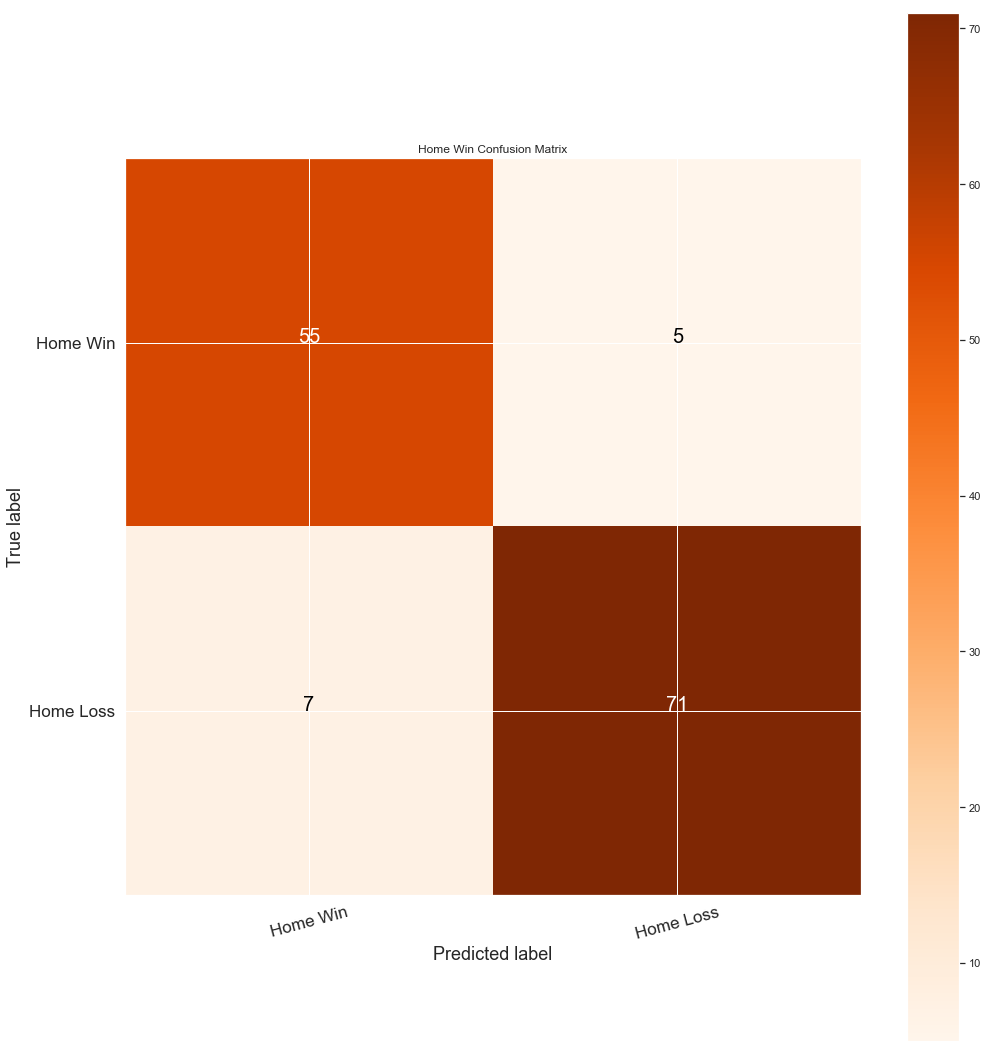

In [29]:
# Plotting the Confusion Matrix
_ = plot_confusion_matrix(HW_CM, classes=['Home Win', 'Home Loss'], title='Home Win Confusion Matrix', cmap=plt.cm.Oranges)
_ = plt.savefig('HW Confusion Matrix Plot.png')

** After all the tests for the Logistic Regression model, we get a very high accuracy score with about 91% for prediction and a lower RMSE. The Confusion Matrix and Classification Report support the predictive power with 126 labels correctly classified along with high precision and recall. However, it is not as strong as the models for Road Win.**

In [30]:
# Finding out which games were mislabeled
HW_dif = HW_y_test[HW_y_test != HW_y_pred]
HW_dif = df.loc[list(HW_dif.index.values), :]
HW_dif

,Date,Home Field Goal Attempts,Home First Downs,Home Fourth Down Attempts,Home Fourth Down Successes,Home Fumble TDs,Home Fumbles,Home Fumbles Lost,Home Fumbles Recovered,Home Goal To Go Attempts,...,Road Time of Possession,Road Total TDs,Road Total Yds,Road Touchbacks,Road Two Point Conversion Attempts,Road Two Point Conversion Successes,Road Win,Road Wins,Season,Week Number
27,"on October 11, 2015",4,29,3,3,1,3,1,0,2,...,1669,2,277,4,1,0,False,0,nfl-2015-2016,5
353,"on January 3, 2016",3,30,2,1,0,2,1,1,2,...,1686,5,447,6,0,0,True,1,nfl-2015-2016,17
89,"on December 6, 2015",4,20,0,0,0,1,0,0,2,...,1486,4,317,2,0,0,True,1,nfl-2015-2016,13
332,"on November 15, 2015",4,21,0,0,0,3,1,1,2,...,1896,3,414,3,0,0,True,1,nfl-2015-2016,10
236,"on December 6, 2015",0,26,0,0,1,1,1,1,3,...,1586,6,403,3,1,0,False,0,nfl-2015-2016,13
113,"on October 18, 2015",1,20,1,0,0,1,1,0,0,...,2204,2,445,2,0,0,True,1,nfl-2015-2016,6
568,"on December 24, 2016",3,30,2,1,0,1,0,0,1,...,2020,4,494,4,0,0,True,1,nfl-2016-2017,16
1140,"on December 31, 2017",0,20,2,0,0,4,1,0,2,...,1855,3,416,1,0,0,False,0,nfl-2017-2018,17
1069,"on December 10, 2017",4,31,0,0,0,1,0,0,2,...,1570,5,421,1,0,0,False,0,nfl-2017-2018,14
1027,"on September 24, 2017",2,18,0,0,0,5,1,0,3,...,2000,4,502,5,0,0,False,1,nfl-2017-2018,3


In [31]:
# Calculating Feature Importance by setting up Logistic Regression model with best parameter
HW_lr = LogisticRegression(C=100000000.0)
HW_lr.fit(HW_X_train, HW_y_train)
HW_lr.coef_

# Creating DataFrame sorted by the features that have the strongest impact
HW_features = pd.concat([pd.DataFrame(HW_X.columns),pd.DataFrame(np.transpose(HW_lr.coef_))], axis = 1)
HW_features.columns = ['Statistic', 'Predictive Value']
HW_features = HW_features.reindex(HW_features['Predictive Value'].abs().sort_values(ascending=False).index)
HW_features

,Statistic,Predictive Value
43,Home Total TDs,7.028496
91,Road Total TDs,-6.820447
17,Home Made Field Goals,4.271718
58,Road INT TDs,-3.642236
21,Home Passing TDs,3.118930
46,Home Two Point Conversion Attempts,-2.453889
65,Road Made Field Goals,-2.378761
10,Home INT TDs,2.367969
54,Road Fumbles Lost,2.213494
45,Home Touchbacks,2.187060


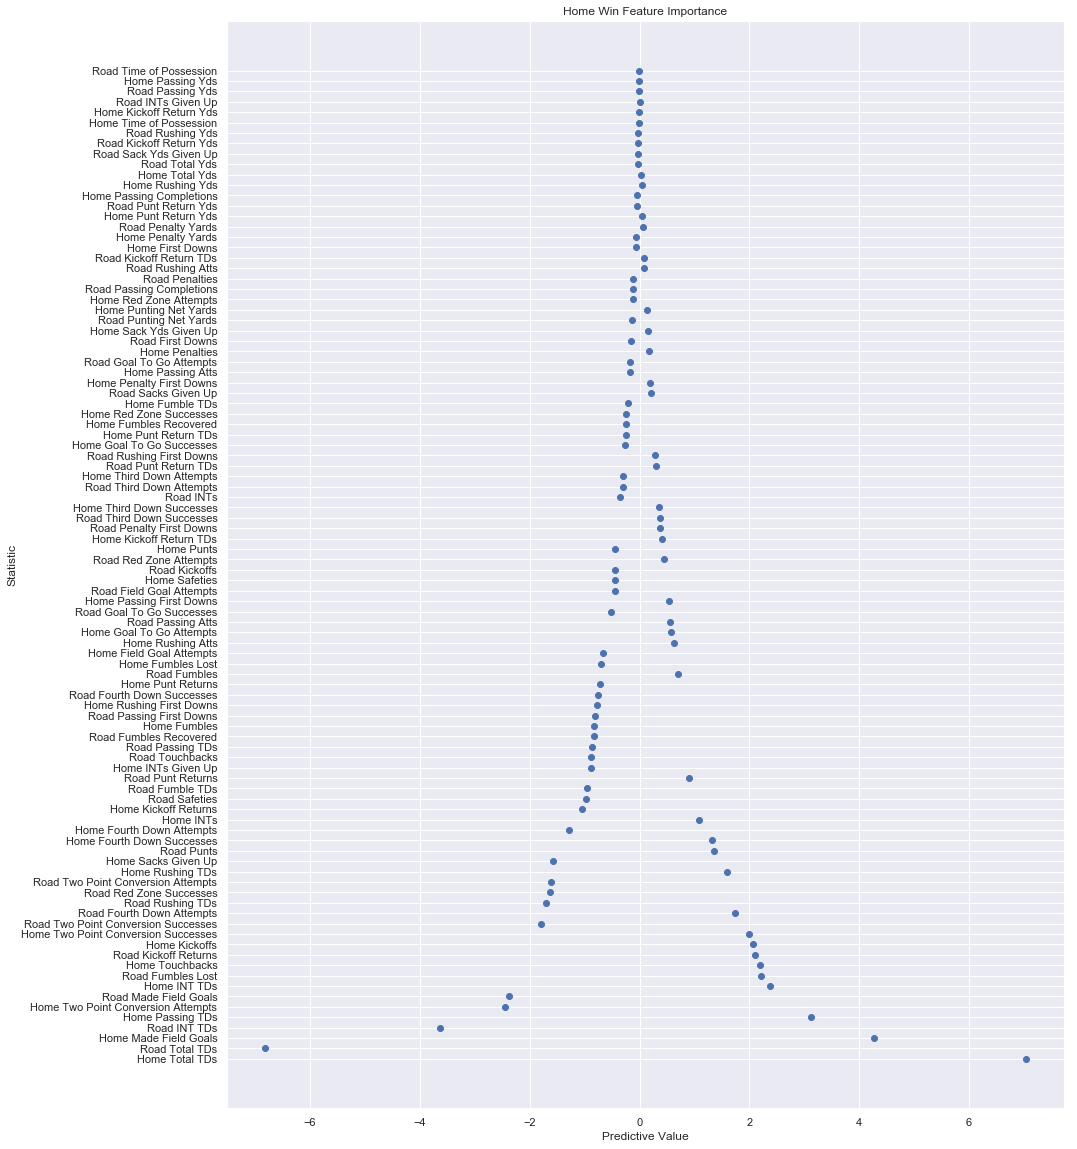

In [32]:
# Plotting the Feature Importance
_ = plt.figure(figsize=(15, 20))
_ = plt.scatter(x=HW_features['Predictive Value'], y=HW_features['Statistic'])
_ = plt.xlabel('Predictive Value')
_ = plt.ylabel('Statistic')
_ = plt.title('Home Win Feature Importance')
_ = plt.savefig('HW Feature Importance.png')

** Some of the most important features in the model focus on scoring especially Total TDs, Made Field Goals and turnover related statistics (all for either team). On the lower end are statistics like Time of Possession and the different type of yards that either team gains.**

In [33]:
# Seeing important stats in mislabeled data
HW_dif[['Home Win', 'Road Total TDs', 'Home Total TDs', 'Road Made Field Goals', 'Home Made Field Goals', 'Road Passing TDs', 'Road INT TDs']]

,Home Win,Road Total TDs,Home Total TDs,Road Made Field Goals,Home Made Field Goals,Road Passing TDs,Road INT TDs
27,True,2,3,2,2,1,0
353,False,5,3,0,3,2,0
89,False,4,2,0,2,1,1
332,False,3,2,2,4,2,0
236,True,6,6,0,0,5,0
113,False,2,3,4,1,1,1
568,False,4,4,2,1,2,0
1140,True,3,4,1,0,2,0
1069,True,5,4,1,4,2,0
1027,True,4,3,1,1,3,0


** When looking at the above statistics, it does appear that the scoring features had the biggest impact on incorrectly labeled data as the higher amounts of Road and Home TDs as well as Made Field Goals seem to have confused the model. Therefore, higher scoring games are the biggest issues in creating outliers.**

In [34]:
# Computing Log Loss
HW_LL = log_loss(HW_y_test, HW_y_pred)
print('Log Loss: ' + str(HW_LL))

Log Loss: 3.00340083135


** The Log Loss is high, indicating that there are some issues with the model. I will also attempt a Random Forest model for the data.**

In [35]:
# Setting up a Random Forest Classifier followed by fitting and predicting on the data
HW_rf = RandomForestClassifier(n_estimators=1000, random_state=42)

HW_rf.fit(HW_X_train, HW_y_train)

HW_rf_pred = HW_rf.predict(HW_X_test)

HW_rf_score = metrics.accuracy_score(HW_y_test, HW_rf_pred)
print('Accuracy Score: ' + str(HW_rf_score))

Accuracy Score: 0.855072463768


In [36]:
# Printing out the Confusion Matrix and Classification Report for the Random Forest Classifier
HW_rf_CM = metrics.confusion_matrix(HW_y_test, HW_rf_pred)
HW_rf_CR = metrics.classification_report(HW_y_test, HW_rf_pred)

print(HW_rf_CM)
print(HW_rf_CR)

[[49 11]
 [ 9 69]]
             precision    recall  f1-score   support

      False       0.84      0.82      0.83        60
       True       0.86      0.88      0.87        78

avg / total       0.85      0.86      0.85       138



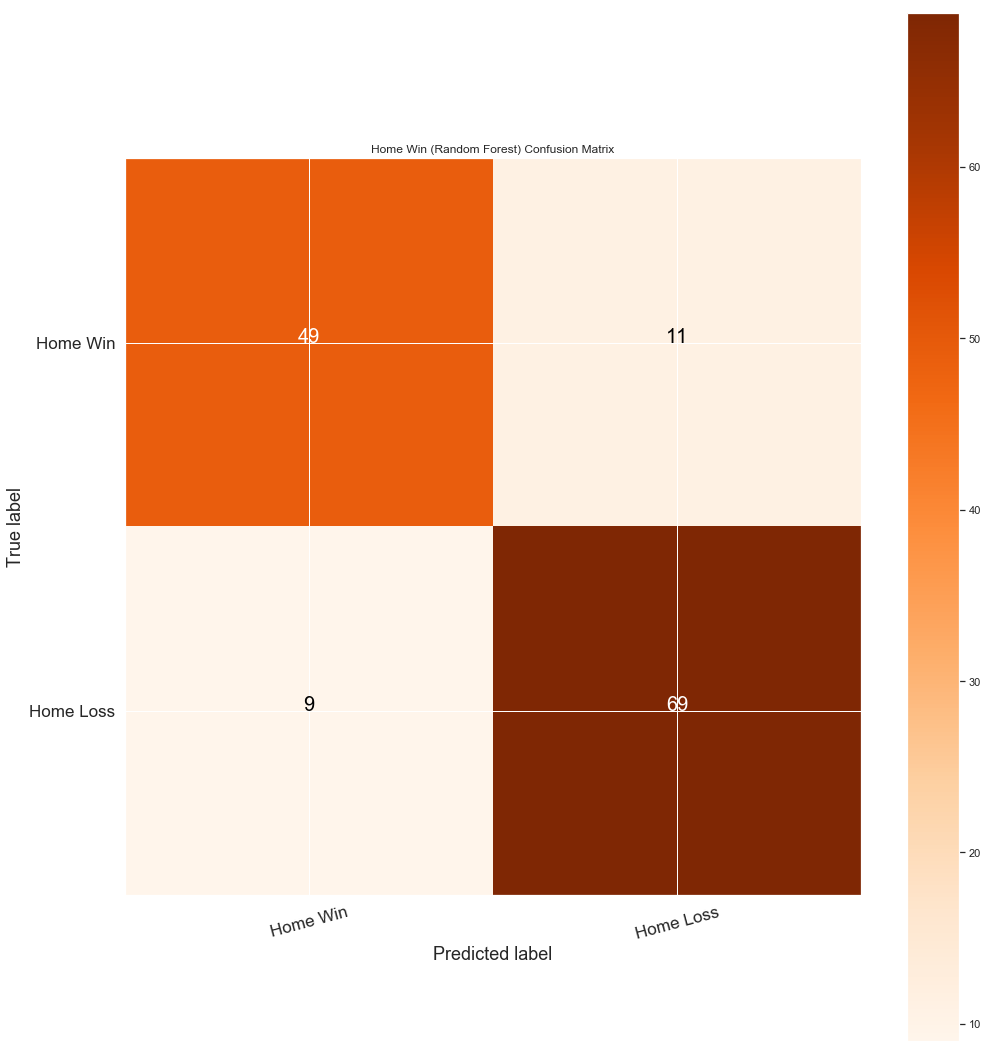

In [37]:
# Plotting the Confusion Matrix
_ = plot_confusion_matrix(HW_rf_CM, classes=['Home Win', 'Home Loss'], title='Home Win (Random Forest) Confusion Matrix', cmap=plt.cm.Oranges)
_ = plt.savefig('HW_rf Confusion Matrix Plot.png')

** After all the tests for the Random Forest model, we get a high accuracy score with about 86% for prediction. The Confusion Matrix and Classification Report support the predictive power with 118 labels correctly classified along with high precision and recall. However, it is not as strong as the Logistic Regression model for Home Win or either models for Road Win.**

In [38]:
# Finding out which games were mislabeled
HW_rf_dif = HW_y_test[HW_y_test != HW_rf_pred]
HW_rf_dif = df.loc[list(HW_rf_dif.index.values), :]
HW_rf_dif

,Date,Home Field Goal Attempts,Home First Downs,Home Fourth Down Attempts,Home Fourth Down Successes,Home Fumble TDs,Home Fumbles,Home Fumbles Lost,Home Fumbles Recovered,Home Goal To Go Attempts,...,Road Time of Possession,Road Total TDs,Road Total Yds,Road Touchbacks,Road Two Point Conversion Attempts,Road Two Point Conversion Successes,Road Win,Road Wins,Season,Week Number
544,"on October 16, 2016",2,19,3,3,0,1,1,0,1,...,2104,2,405,6,0,0,False,0,nfl-2016-2017,6
353,"on January 3, 2016",3,30,2,1,0,2,1,1,2,...,1686,5,447,6,0,0,True,1,nfl-2015-2016,17
89,"on December 6, 2015",4,20,0,0,0,1,0,0,2,...,1486,4,317,2,0,0,True,1,nfl-2015-2016,13
359,"on December 6, 2015",3,14,2,1,0,0,0,1,1,...,2311,2,485,2,0,0,True,1,nfl-2015-2016,13
122,"on December 27, 2015",1,16,1,1,0,1,0,0,0,...,1864,1,372,0,0,0,False,0,nfl-2015-2016,16
332,"on November 15, 2015",4,21,0,0,0,3,1,1,2,...,1896,3,414,3,0,0,True,1,nfl-2015-2016,10
639,"on January 1, 2017",0,21,2,2,0,1,0,0,1,...,2334,3,463,2,0,0,False,0,nfl-2016-2017,17
681,"on November 6, 2016",2,22,2,1,0,0,0,0,2,...,2011,2,316,1,0,0,True,1,nfl-2016-2017,9
37,"on November 22, 2015",5,16,1,0,0,2,0,3,2,...,1628,2,222,1,0,0,False,0,nfl-2015-2016,11
871,"on September 25, 2016",2,28,0,0,0,3,1,0,3,...,2006,2,417,7,0,0,True,1,nfl-2016-2017,3


In [39]:
# Calculating Feature Importance from Random Forest Classifier
HW_rf_feature_imp = pd.Series(HW_rf.feature_importances_, index=HW_X.columns).sort_values(ascending=False)
HW_rf_feature_imp

Home Kickoffs                          0.073179
Home Rushing Atts                      0.072761
Road Rushing Atts                      0.066187
Home Total TDs                         0.042324
Road Kickoffs                          0.040742
Road Total TDs                         0.033353
Home Touchbacks                        0.028027
Home Time of Possession                0.027929
Road Time of Possession                0.024564
Home Passing Atts                      0.023526
Home Fourth Down Attempts              0.020352
Road Passing Atts                      0.020352
Road Fourth Down Attempts              0.016468
Road Rushing Yds                       0.016070
Home Rushing Yds                       0.015986
Road Sack Yds Given Up                 0.014141
Home Total Yds                         0.012402
Road Red Zone Attempts                 0.011925
Road Total Yds                         0.011892
Home INTs                              0.011747
Home Sack Yds Given Up                 0

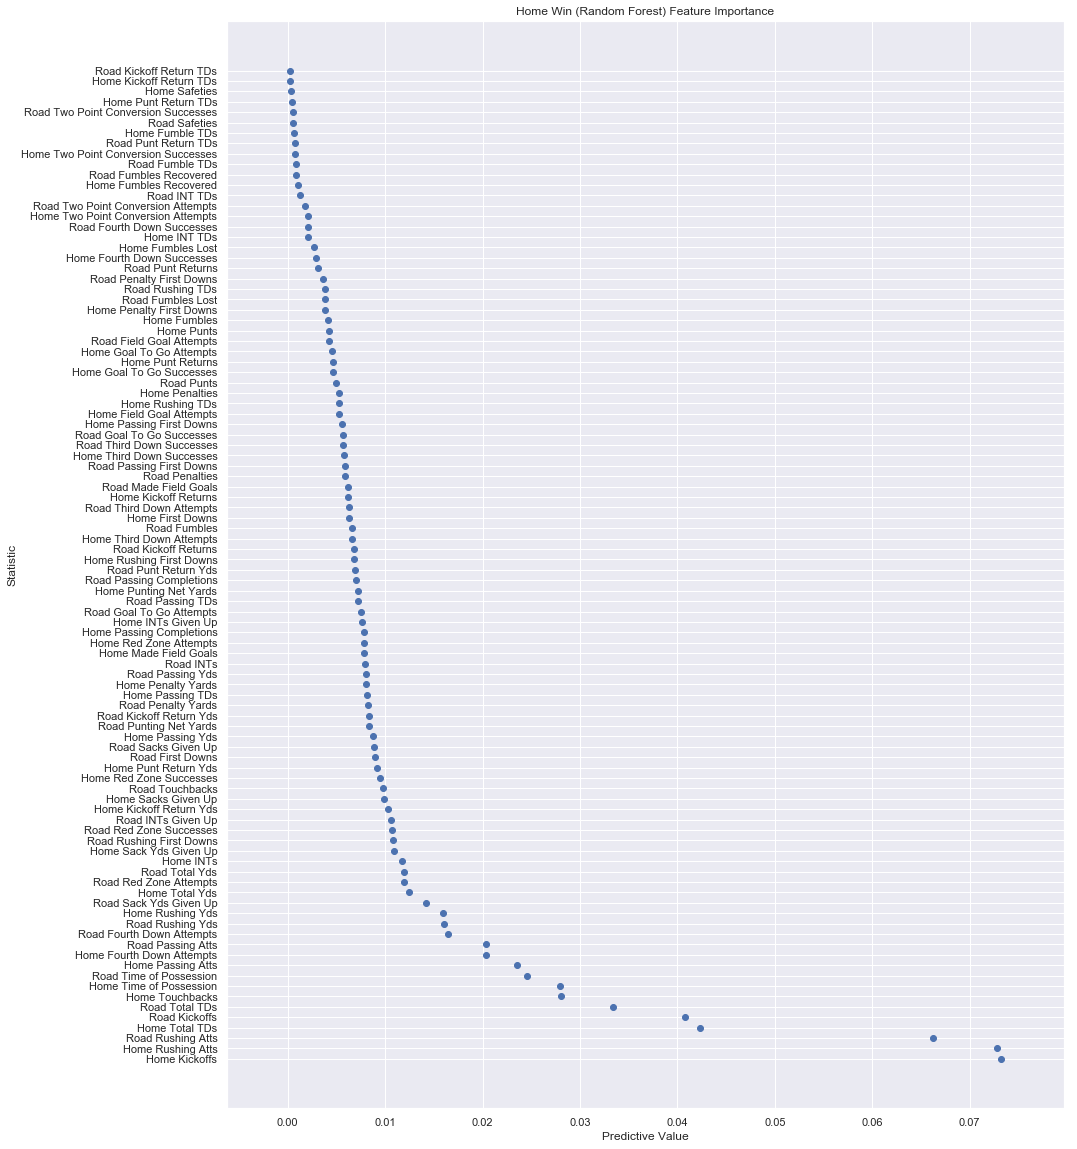

In [40]:
# Plotting the Feature Importance
_ = plt.figure(figsize=(15, 20))
_ = plt.scatter(list(HW_rf_feature_imp), HW_rf_feature_imp.index )
_ = plt.xlabel('Predictive Value')
_ = plt.ylabel('Statistic')
_ = plt.title('Home Win (Random Forest) Feature Importance')
_ = plt.savefig('HW_rf Feature Importance.png')

** Some of the most important features in the model include Home and Road Rushing Attempts, Home and Road Kickoffs, Home and Road Total TDs as well as Home and Road Time of Possession. As expected stats like Passing Yards, for either team, was not that important of a feature and the least important features were some of the less common occurrences in a football game like Kickoff Return TDs, Safeties and Two Point Conversion Successes (for either team). There were definitely some differences though compared to the Logistic Regression features.**

In [41]:
# Seeing important stats in mislabeled data
HW_rf_dif[['Home Win', 'Road Kickoffs', 'Home Kickoffs', 'Road Rushing Atts', 'Home Rushing Atts', 'Road Time of Possession', 'Home Time of Possession', 'Road Total TDs', 'Home Total TDs']]

,Home Win,Road Kickoffs,Home Kickoffs,Road Rushing Atts,Home Rushing Atts,Road Time of Possession,Home Time of Possession,Road Total TDs,Home Total TDs
544,True,6,6,26,17,2104,1496,2,3
353,False,6,7,26,36,1686,1914,5,3
89,False,4,6,23,42,1486,2244,4,2
359,False,6,6,24,24,2311,1796,2,2
122,True,4,4,36,27,1864,1736,1,2
332,False,6,7,23,23,1896,1704,3,2
639,True,5,5,33,28,2334,1989,3,4
681,False,4,5,25,25,2011,1988,2,2
37,True,3,3,29,28,1628,1972,2,1
871,False,8,6,30,21,2006,1594,2,3


** When looking at the above statistics, it does appear that Rome and Home Kickoffs as well as Rushing Atts had the biggest impact on incorrectly labeled data as the team that led in one of those categories did not win. Therefore, the games where the losing team controls the ball more are the biggest issues in creating outliers.**

In [42]:
# Computing Log Loss for the Random Forest Classifier
HW_rf_LL = log_loss(HW_y_test, HW_rf_pred)
print('Log Loss: ' + str(HW_rf_LL))

Log Loss: 5.00568350341


** Yet again, Log Loss is high meaning there are issues with this model as well. While both models are accurate, there is punishment for being confident and wrong.**